In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load the data
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Print the shape of the training and test sets
print("Training data shape:",X_train.shape)
print("Training labels shape:",y_train.shape)
print("Test data shape:",X_test.shape)
print("Test labels shape:",y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


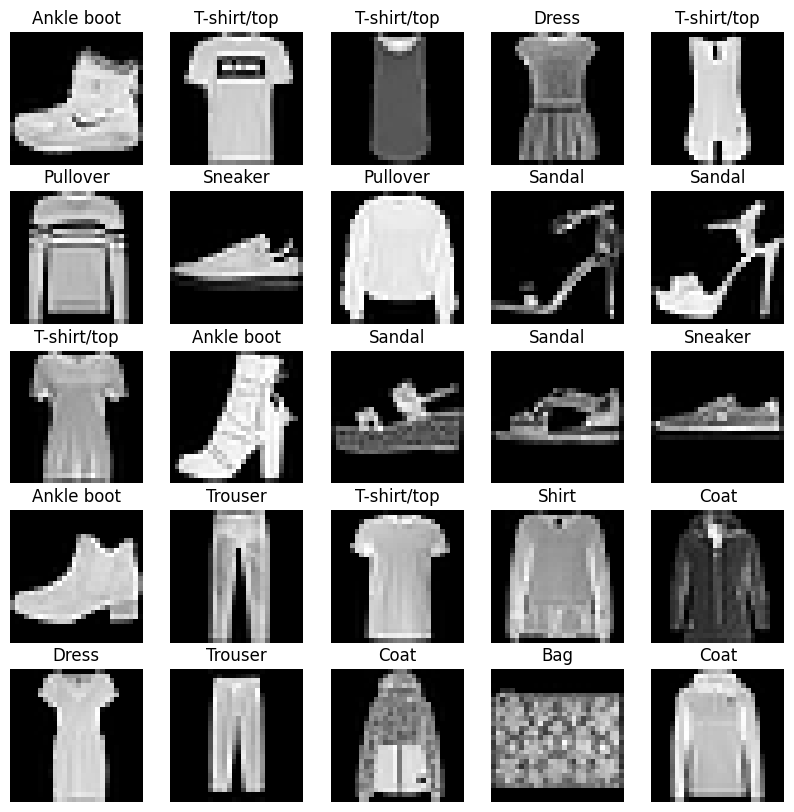

In [5]:
import matplotlib.pyplot as plt
# Define class labels for Fashion MNIST
class_labels ={
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}
# Display a few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(25): # Change this number to display more or fewer images
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(class_labels[y_train[i]])
  plt.axis('off')
plt.show()
# Displaying grayscale images

In [10]:
# Normalize the pixel values to be between e and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to have a single channel (grayscale images)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
model = Sequential([
tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 52s 136ms/step - loss: 0.6990 - accuracy: 0.7466 - val_loss: 0.4377 - val_accuracy: 0.8433
Epoch 2/10
375/375 [==============================] - 47s 125ms/step - loss: 0.4441 - accuracy: 0.8390 - val_loss: 0.3645 - val_accuracy: 0.8662
Epoch 3/10
375/375 [==============================] - 44s 117ms/step - loss: 0.3847 - accuracy: 0.8602 - val_loss: 0.3255 - val_accuracy: 0.8790
Epoch 4/10
375/375 [==============================] - 46s 124ms/step - loss: 0.3475 - accuracy: 0.8741 - val_loss: 0.3167 - val_accuracy: 0.8821
Epoch 5/10
375/375 [==============================] - 43s 113ms/step - loss: 0.3244 - accuracy: 0.8841 - val_loss: 0.2865 - val_accuracy: 0.8928
Epoch 6/10
375/375 [==============================] - 46s 122ms/step - loss: 0.3033 - accuracy: 0.8892 - val_loss: 0.2818 - val_accuracy: 0.8972
Epoch 7/10
375/375 [==============================] - 43s 114ms/step - loss: 0.2886 - accuracy: 0.8959 - val_loss: 0.2752 - val_ac

In [14]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 9ms/step - loss: 0.2689 - accuracy: 0.9042
Test Accuracy: 0.90420001745224


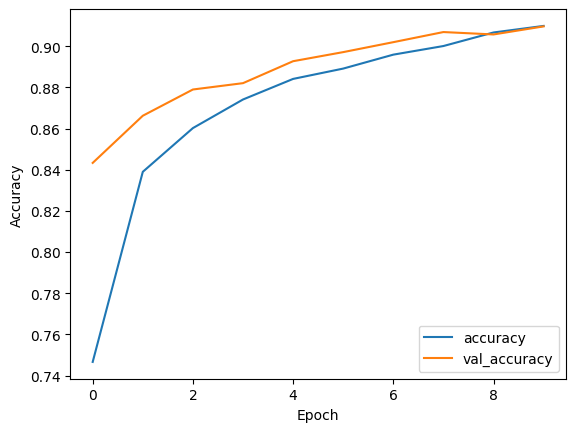

In [15]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()